# PROJECT :REVIEW OF COVID-19 CASES IN INDIA 

AJAY KUMAR GAUTAM (M.Tech||IITG||SPML)

In [114]:
import pandas as pd
import datetime as dt
from matplotlib import pyplot as plt
import seaborn as sns



In [115]:
df = pd.read_csv('C:/data/covid_19_india.csv')
df.head()


,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [116]:
'''checking the missing data'''
print(df.isnull().sum()) #No missing data
df = df.dropna()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64


In [117]:
df.drop(['Sno','Time','ConfirmedIndianNational','ConfirmedForeignNational','Cured'],axis = 1,inplace = True)

In [118]:
print(df.dtypes)

Date                    object
State/UnionTerritory    object
Deaths                   int64
Confirmed                int64
dtype: object


In [119]:
# converting string value of datw to datatime format 
df['Date'] = df['Date'].astype(str)
print(df.dtypes)


Date                    object
State/UnionTerritory    object
Deaths                   int64
Confirmed                int64
dtype: object


In [123]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
print(df.dtypes)

Date                    datetime64[ns]
State/UnionTerritory            object
Deaths                           int64
Confirmed                        int64
dtype: object


In [128]:
#Change column titles for closer observation for total cases and total death 
df.columns = ['Date', 'State', 'Total Deaths', 'Total Cases']

#Grouping by location and dateand select only total cases and deaths 
#Resetting the index 
df = pd.DataFrame(df.groupby(['Date', 'State'])['Total Cases', 'Total Deaths'].sum()).reset_index()

#Sort values by each state and by date in descending order
df = df.sort_values(by = ['State','Date'], ascending=False)
print(df.head())


            Date        State  Total Cases  Total Deaths
18109 2021-08-11  West Bengal        18252       1534999
18073 2021-08-10  West Bengal        18240       1534360
18037 2021-08-09  West Bengal        18229       1533803
18001 2021-08-08  West Bengal        18217       1533128
17965 2021-08-07  West Bengal        18202       1532379


<ipython-input-128-d9bf68c02b78>:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df = pd.DataFrame(df.groupby(['Date', 'State'])['Total Cases', 'Total Deaths'].sum()).reset_index()


In [131]:
#Plot total cases and total deaths as bar plot for top 10 states 
def bar_graph(feature, value, title, DF, size):
    f, ax = plt.subplots(1,1, figsize=(3*size,3))
    DF = DF.sort_values([value], ascending=False).reset_index(drop=True)
    g = sns.barplot(DF[feature][0:10], DF[value][0:10], palette='Set3')
    g.set_title("Number of {} - highest 10 states".format(title))
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
    plt.show()    


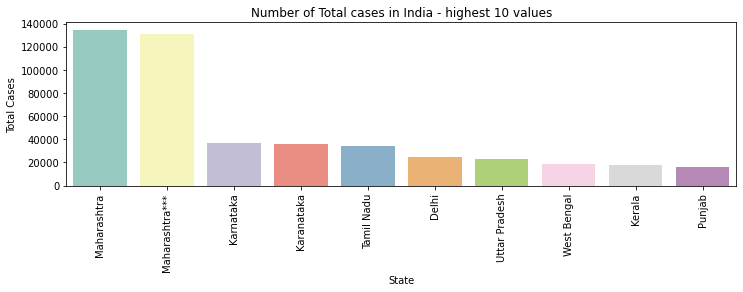

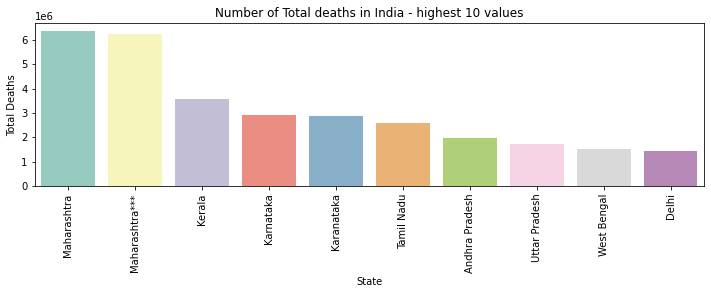

In [132]:
filtered_df = df.drop_duplicates(subset = ['State'], keep='first')
bar_graph('State', 'Total Cases', 'Total cases in India', filtered_df, size=4)
bar_graph('State', 'Total Deaths', 'Total deaths in India', filtered_df, size=4)


          Date  Total Cases  Total Deaths
0   2020-01-30            1             0
1   2020-01-31            1             0
2   2020-02-01            2             0
3   2020-02-02            3             0
4   2020-02-03            3             0
..         ...          ...           ...
555 2021-08-07     31895385        427371
556 2021-08-08     31934455        427862
557 2021-08-09     31969954        428309
558 2021-08-10     31998158        428682
559 2021-08-11     32036511        429179

[560 rows x 3 columns]


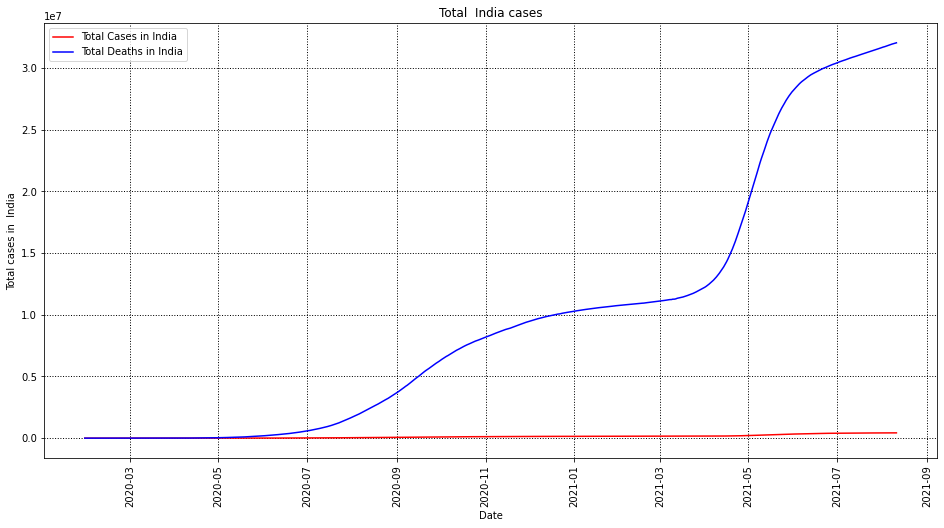

In [135]:
#Plot total cases and deaths in INDIA 
def bar_India_total(df, title='Total plot', size=1):
    f, ax = plt.subplots(1,1, figsize=(4*size,2*size))
    g = sns.lineplot(x="Date", y='Total Cases', data=df, color='red', label='Total Cases in India ')
    g = sns.lineplot(x="Date", y='Total Deaths', data=df, color='blue', label='Total Deaths in India')
    plt.xlabel('Date')
    plt.ylabel(f'Total cases in {title}')
    plt.xticks(rotation=90)
    plt.title(f'Total {title} cases')
    ax.grid(color='black', linestyle='dotted', linewidth=1.0)
    plt.show()  

#Group by dates. 
#Reset index because groupby by default makes grouped columns indices
#Sum values from all countries per given date
df_total = df.groupby(['Date']).sum().reset_index()
print(df_aggregate)

bar_India_total(df_total, ' India', size=4)

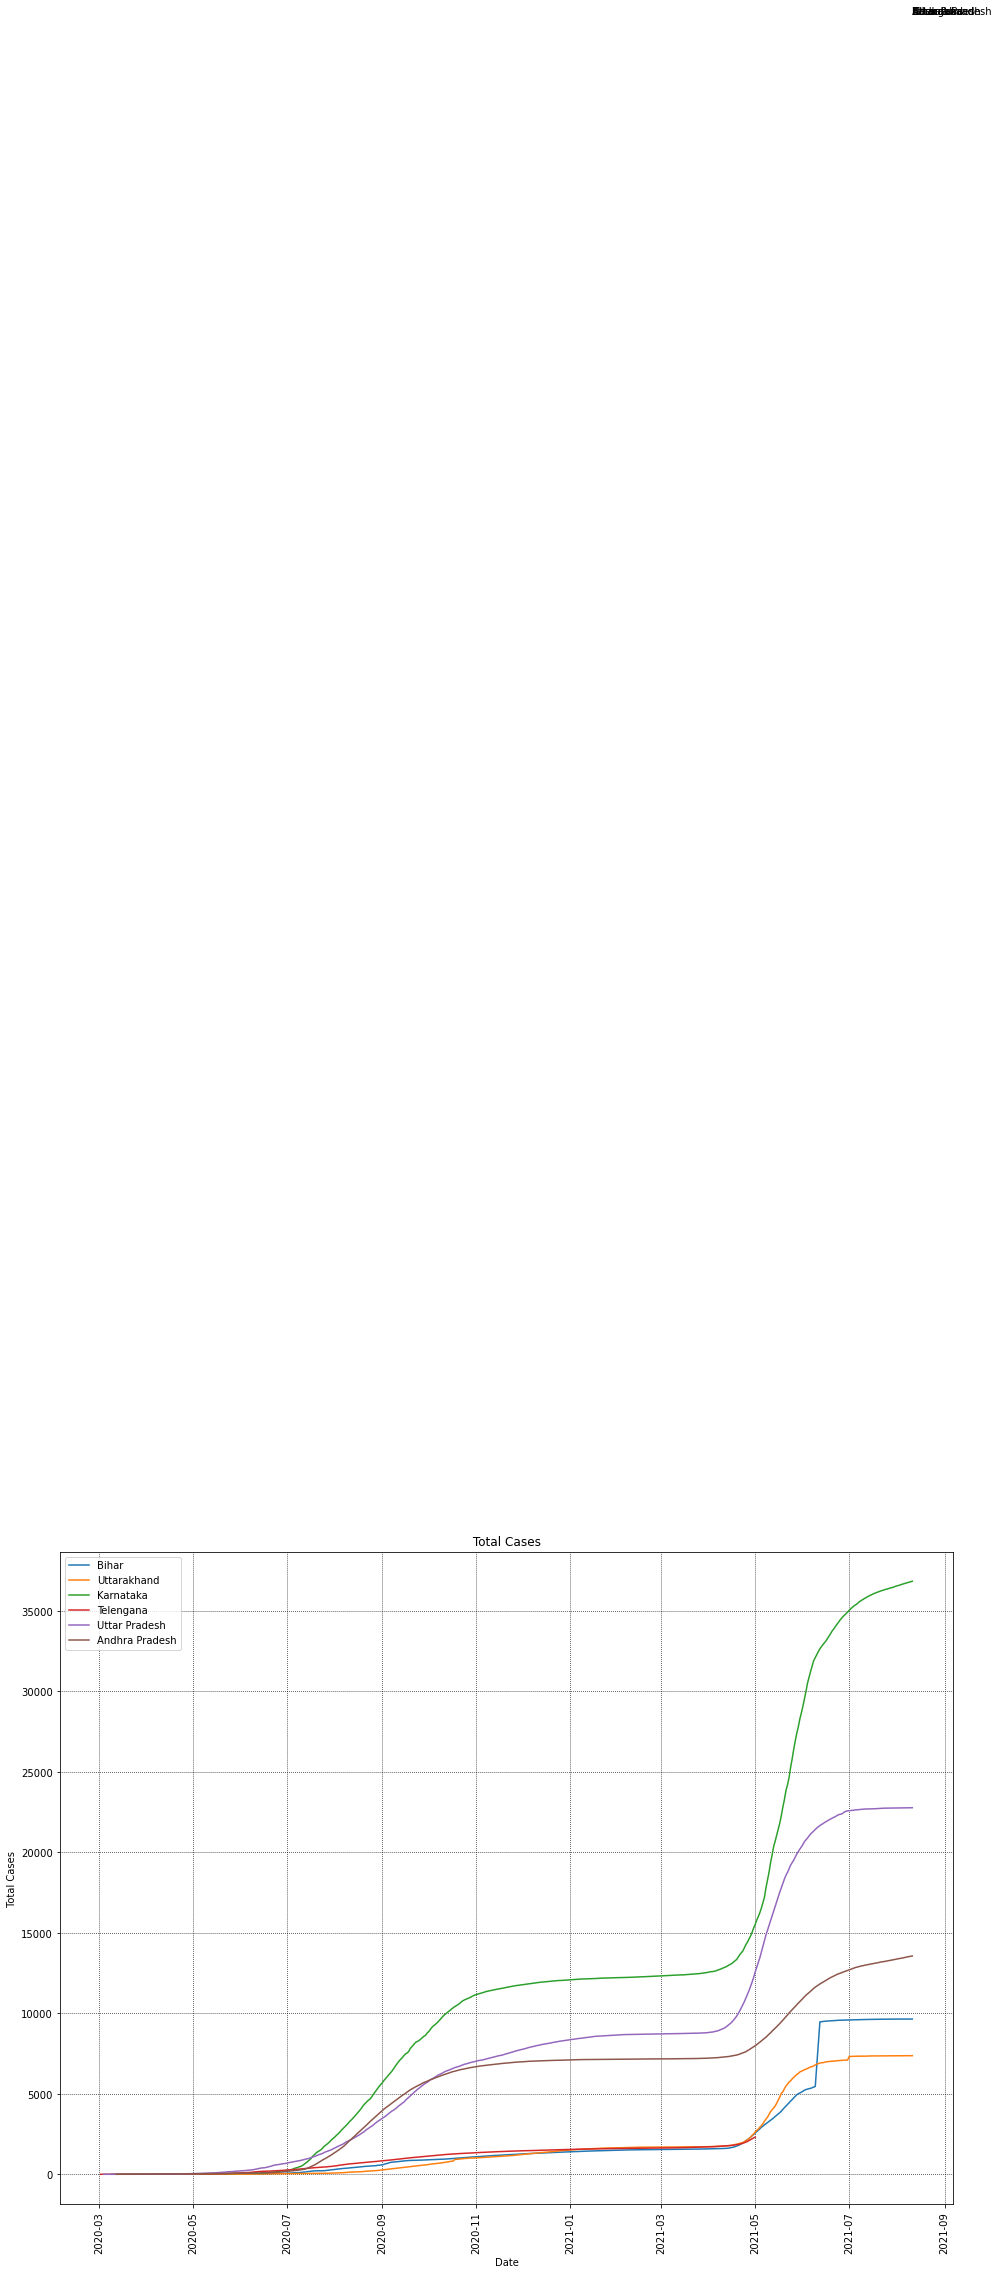

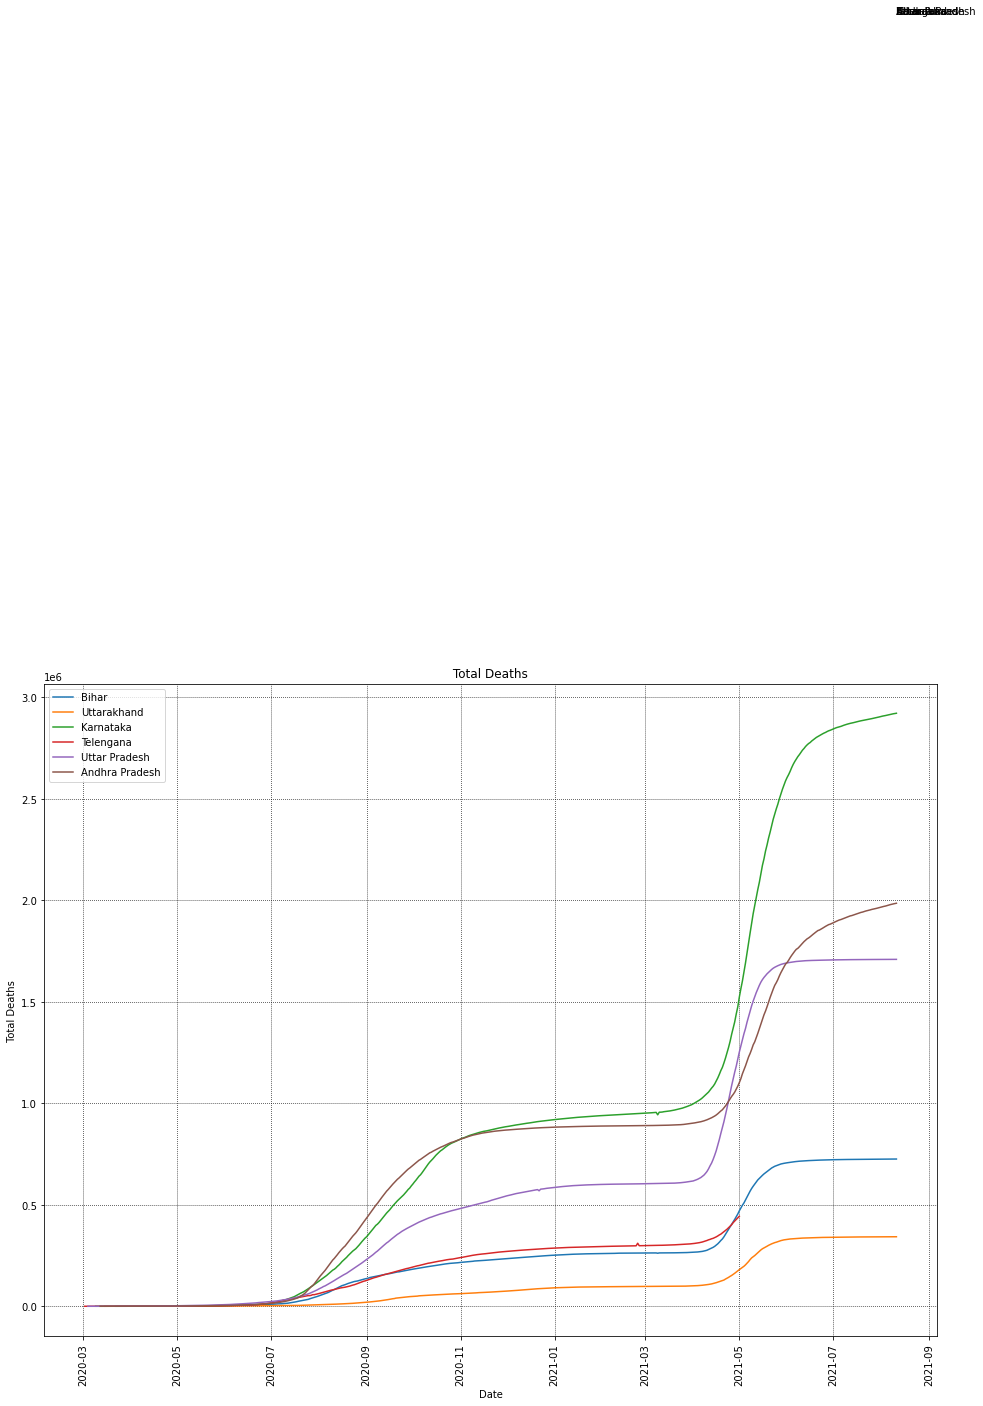

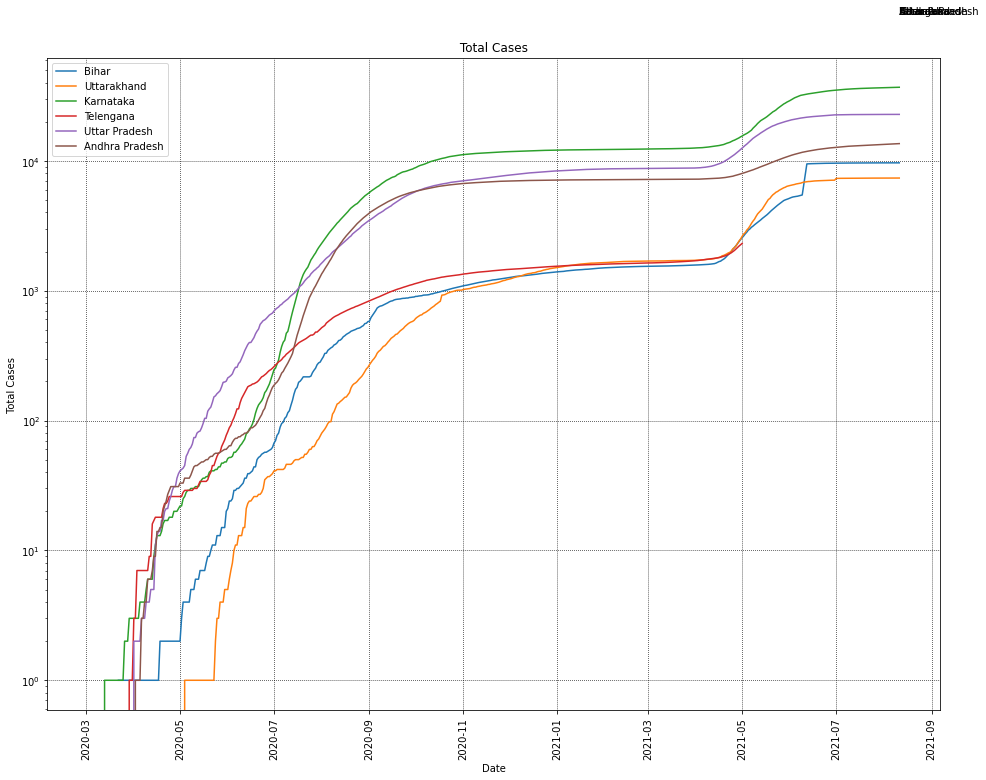

In [140]:
#Plotting total cases and deaths for selected states. 

def plot_states(df, states, case_type='Total Cases', size=3, is_log=False):
    f, ax = plt.subplots(1,1, figsize=(4*size, 3*size))
    for state in states:
        df_ = df[(df['State']==state) & (df['Date'] > '2020-03-01')] 
        g = sns.lineplot(x="Date", y=case_type, data=df_,  label=state)  
        ax.text(max(df['Date']), max(df[case_type]), str(state))
    plt.xlabel('Date')
    plt.ylabel(f' {case_type} ')
    plt.title(f' {case_type} ')
    plt.xticks(rotation=90)
    if(is_log):
        ax.set(yscale="log")
    ax.grid(color='black', linestyle='dotted', linewidth=0.75)
    plt.show()  

df_state = df.groupby(['State', 'Date']).sum().reset_index()

states = ["Bihar", "Uttarakhand", "Karnataka", "Telengana", 
                         "Uttar Pradesh", "Andhra Pradesh"]
plot_states(df_state, states, case_type = 'Total Cases', size=4)    

plot_states(df_state, states, case_type = 'Total Deaths', size=4)

#log scale
#plot_states(df_state, states, case_type = 'Total Cases', size=4, is_log=True)


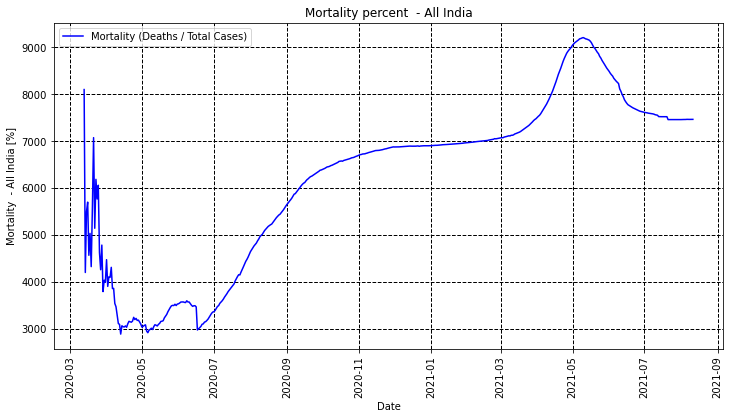

In [143]:
#Calculating Mortality percentage in India

def plot(df, title='Mortality', size=1):
    f, ax = plt.subplots(1,1, figsize=(4*size,2*size))
    g = sns.lineplot(x="Date", y='Mortality (Deaths/Cases)', data=df, color='blue', label='Mortality (Deaths / Total Cases)')
    plt.xlabel('Date')
    plt.ylabel(f'Mortality {title} [%]')
    plt.xticks(rotation=90)
    plt.title(f'Mortality percent {title}')
    ax.grid(color='black', linestyle='dashed', linewidth=1)
    plt.show()  

df_total['Mortality (Deaths/Cases)'] = df_total['Total Deaths'] / df_total['Total Cases'] * 100
plot(df_total, title = ' - All India', size = 3)